
# Assignment 3  <font color="blue"> (15 points) </font>
 
------
### Information
**Name:** Ahmed Ibrahim

**Student Number:** 261032796

**Date:** 2021-11-15

**Course Number:** YCBS 255 - Statistical Machine Learning

------

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

## Part A

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Question A1: Generate x1 array.
x1 = np.linspace(-20, 20, 100)

In [3]:
# Question A1: Generate x2, x3, x4, x5 array.
x1 = np.linspace(-20, 20, 100)
x_list = [x1]
x_range = np.arange(2,6)

for value in x_range:
  x_value = np.power(x1, value)
  x_list.append(x_value)

x2 = x_list[1]
x3 = x_list[2]
x4 = x_list[3]
x5 = x_list[4]

X = pd.DataFrame(x_list, index = ['x1', 'x2', 'x3', 'x4', 'x5']).transpose().to_numpy()

In [4]:
# Question A2: Generate 'y' function.
np.random.seed(12)
mu = 0
sigma = math.sqrt(4)
eps = np.random.normal(mu, sigma, 100)

y = 1.75 + 5*x1 + 0.05*x3 -10.3*x5 + eps

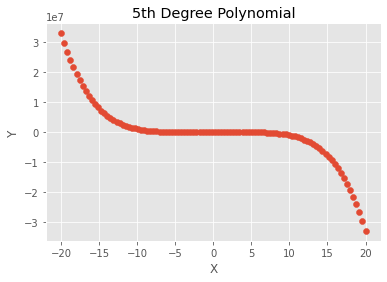

In [5]:
# Question A2: Plot polynomial.
plt.scatter(x1, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('5th Degree Polynomial')

plt.show();

In [6]:
# Question A3: Split the dataset into training (70%) and test sets (30%). 'A' is for 'Question A'. 
from sklearn.model_selection import train_test_split
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [7]:
# Question A3: Using  5-fold cross-validation, train a lasso model with 10 different tunning parameters.
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import math

k = 5
kf_5 = KFold(n_splits = k, random_state = 12, shuffle = True)
tunning_para_list = [0.05, 0.1, 1, 5, 50, 500, 2500, 10000]

lasso_avg_rmse_CV_list = []
lasso_avg_rmse_test_list = []

X = X_train_A
y = y_train_A

for tunning_para in tunning_para_list:
  print(f"Tunning Parameter: {tunning_para}")
  lasso_regression = Lasso(alpha = tunning_para)

  lasso_rmse_CV_list = []
  lasso_rmse_test_list = []

  for train_index, test_index in kf_5.split(X_train_A):
    X_train_A_CV, X_test_A_CV = X[train_index], X[test_index]
    y_train_A_CV, y_test_A_CV = y[train_index], y[test_index]

    lasso_regression.fit(X_train_A_CV, y_train_A_CV)
    print(f"Lasso Coefficients: {lasso_regression.coef_}")

    y_pred_A_CV = lasso_regression.predict(X_test_A_CV)
    lasso_rmse_CV = math.sqrt(mean_squared_error(y_test_A_CV, y_pred_A_CV))
    lasso_rmse_CV_list.append(lasso_rmse_CV)

    y_pred_A_test = lasso_regression.predict(X_test_A)
    lasso_rmse_test = math.sqrt(mean_squared_error(y_test_A, y_pred_A_test))
    lasso_rmse_test_list.append(lasso_rmse_test)
  
  lasso_avg_rmse_CV = sum(lasso_rmse_CV_list)/len(lasso_rmse_CV_list)
  lasso_avg_rmse_CV_list.append(lasso_avg_rmse_CV)

  lasso_avg_rmse_test = sum(lasso_rmse_test_list)/len(lasso_rmse_test_list)
  lasso_avg_rmse_test_list.append(lasso_avg_rmse_test)

print(f"CV-rmse: {lasso_avg_rmse_CV_list}")
print(f"test-rmse: {lasso_avg_rmse_test_list}")

Tunning Parameter: 0.05
Lasso Coefficients: [ 8.30094531e+01 -1.20947700e-01 -7.58535727e-01  8.50753685e-04
 -1.02983320e+01]
Lasso Coefficients: [ 3.45595698e+02  1.54877560e+00 -3.81324065e+00 -3.26451349e-03
 -1.02918622e+01]
Lasso Coefficients: [ 3.85172741e+01  3.35718387e-01 -3.00908381e-01 -8.39437598e-04
 -1.02992820e+01]
Lasso Coefficients: [ 4.58937744e+01  1.18656394e+00 -4.16040045e-01 -3.66768329e-03
 -1.02989861e+01]
Lasso Coefficients: [ 2.07968735e+02 -7.75476872e-01 -2.11759386e+00  1.42122382e-03
 -1.02955615e+01]
Tunning Parameter: 0.1
Lasso Coefficients: [ 8.30017687e+01 -1.20879930e-01 -7.58466681e-01  8.50536819e-04
 -1.02983322e+01]
Lasso Coefficients: [ 3.45588590e+02  1.54873571e+00 -3.81317225e+00 -3.26442400e-03
 -1.02918623e+01]
Lasso Coefficients: [ 3.85107192e+01  3.35673786e-01 -3.00850684e-01 -8.39321612e-04
 -1.02992821e+01]
Lasso Coefficients: [ 4.58869391e+01  1.18649918e+00 -4.15976526e-01 -3.66747989e-03
 -1.02989862e+01]
Lasso Coefficients: [ 2.07

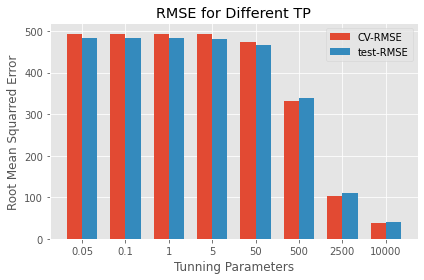

In [8]:
# Question A4: Plot mse vs tunning parameters.
width = 0.35

labels = tunning_para_list
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lasso_avg_rmse_CV_list, width, label = 'CV-RMSE')
rects2 = ax.bar(x + width/2, lasso_avg_rmse_test_list, width, label = 'test-RMSE')

ax.set_ylabel('Root Mean Squarred Error')
ax.set_xlabel('Tunning Parameters')
ax.set_title('RMSE for Different TP')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show();

### Question A4: The choice of the tuning parameter.
To train the lasso regression model, the data was split using 70 % for training and 30 % for testing. On the training portion, 5-fold cross-validation was applied. For the cross-validation, the 'KFold' function had the 'shuffle' set to 'True' to enable each split to be trained on a random batch of 'X' and 'y' values across the full range of values. The 'random_state' was set to a certain integer, in this case being 12 to ensure the same indices were used for each tunning parameter for consistency purposes. 

For 10 tunning parameters, 5 splits were generated and the coefficients of the resulting models were printed. The scoring used for every split is the mean squared error (MSE), where the root mean squared error (RMSE) is computed and stored. For each split of the fitted model, two RMSEs were calculated, where one was using the y-values from the validation portion ('CV-RMSE') as the 'True' values and the other was using the y-values from the testing portion from the initial split ('test-RMSE'). For every tunning parameter, the average RMSE for the validation and testing portions were computed and plotted. Based on the plot, the RMSE for the testing portions is lower than its validation counterpart for most of the tuning parameters. Among the tunning parameters, the highest tunning parameter yielded both the lowest validation and test RMSE, being 37.74 and 40.01 respectively; making it the best tunning parameter among the batch trained. 

Variable selection did occur for three tunning parameters being: '500', '2500' and '10000'. For the '500' tunning parameter, only 2 of its 5 splits had
the first and second coefficients being eliminated while 2 others only had the second coefficients eliminated. As for the other tuning parameters, both the first and second coefficients were eliminated for all of their splits. 


## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


## Part B

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd

In [10]:
# Question B1: Download Wage.csv.
from google.colab import files
uploaded = files.upload()
wage_data = pd.read_csv('Wage.csv')

Saving Wage.csv to Wage (1).csv


In [11]:
# Question B1: Do some data exploration on 'Wage.csv'.
wage_data.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [12]:
wage_data.shape

(3000, 13)

In [13]:
wage_data.dtypes

Unnamed: 0      int64
year            int64
age             int64
sex            object
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [14]:
wage_data.describe(include = 'all')

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000,3000,3000,3000,3000,3000,3000,3000,3000.000000,3000.000000
unique,NaN,NaN,NaN,1,5,4,5,1,2,2,2,NaN,NaN
top,NaN,NaN,NaN,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,NaN,NaN
freq,NaN,NaN,NaN,3000,2074,2480,971,3000,1544,2142,2083,NaN,NaN
mean,218883.373000,2005.791000,42.414667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653905,111.703608
std,145654.072587,2.026167,11.542406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.857332,128.680488


In [15]:
# Question B1: Extract necessary columns.
data_x = wage_data['age']
data_y = wage_data['wage']

In [16]:
data_x.index

RangeIndex(start=0, stop=3000, step=1)

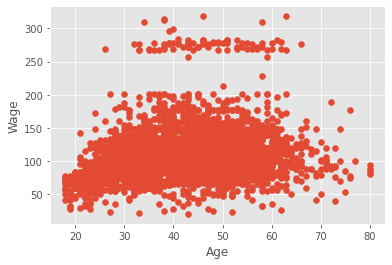

In [17]:
# Querstion B1: Plot data.
plt.scatter(data_x, data_y)
plt.xlabel('Age')
plt.ylabel('Wage')

plt.show();

In [18]:
# Question B1: Split the dataset into training (70%) and test sets (30%). 'B1' is for 'Question B1'. 
from sklearn.model_selection import train_test_split
X_train_B1, X_test_B1, y_train_B1, y_test_B1 = train_test_split(data_x, data_y, test_size = 0.3, random_state = 12)

In [19]:
# Question B1: Perform polynomial regression using 5-fold cross validation to find optimal degree.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import math

k = 5
kf_5 = KFold(n_splits = k, random_state = 12, shuffle = True)
degree_nth_list = np.arange(2, 10)

X_B1 = np.array(X_train_B1).reshape(-1, 1)
y_B1 = np.array(y_train_B1)

X_test = np.array(X_test_B1).reshape(-1, 1)
y_test = np.array(y_test_B1) 

poly_avg_rmse_CV_list = []
poly_avg_rmse_test_list = []

for degree_nth in degree_nth_list:
  print(f"Degree of Polynomial: {degree_nth}")
  polynomial_model = PolynomialFeatures(degree = degree_nth)

  poly_rmse_CV_list = []
  poly_rmse_test_list = []

  for train_index, test_index in kf_5.split(X):
    X_train_B1_CV, X_test_B1_CV = X_B1[train_index], X_B1[test_index]
    y_train_B1_CV, y_test_B1_CV = y_B1[train_index], y_B1[test_index]

    X_poly = polynomial_model.fit_transform(X_train_B1_CV)
    model_poly = sm.OLS(y_train_B1_CV, X_poly).fit()
    print(f"Polynomial Coefficients: {model_poly.params}")

    X_poly_pred_B1_CV = polynomial_model.fit_transform(X_test_B1_CV)
    y_pred_B1_CV = model_poly.predict(X_poly_pred_B1_CV)
    poly_rmse_CV = math.sqrt(mean_squared_error(y_test_B1_CV, y_pred_B1_CV))
    poly_rmse_CV_list.append(poly_rmse_CV)

    X_poly_pred_B1_test = polynomial_model.fit_transform(X_test)
    y_pred_B1_test = model_poly.predict(X_poly_pred_B1_test)
    poly_rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_B1_test))
    poly_rmse_test_list.append(poly_rmse_test)

  poly_avg_rmse_CV = sum(poly_rmse_CV_list)/len(poly_rmse_CV_list)
  poly_avg_rmse_CV_list.append(poly_avg_rmse_CV)

  poly_avg_rmse_test = sum(poly_rmse_test_list)/len(poly_rmse_test_list)
  poly_avg_rmse_test_list.append(poly_avg_rmse_test)

print(f"CV-mse: {poly_avg_rmse_CV_list}")
print(f"test-mse: {poly_avg_rmse_test_list}")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Degree of Polynomial: 2
Polynomial Coefficients: [-8.74362919  4.44763758 -0.03827398]
Polynomial Coefficients: [-48.94524511   6.80788341  -0.0665741 ]
Polynomial Coefficients: [-19.86949353   5.11400068  -0.04544367]
Polynomial Coefficients: [-30.62706426   5.97979819  -0.05871159]
Polynomial Coefficients: [ 8.43536191  3.75580411 -0.03141226]
Degree of Polynomial: 3
Polynomial Coefficients: [-2.24490917e+02  2.18929834e+01 -4.74100550e-01  3.40164646e-03]
Polynomial Coefficients: [-2.99964757e+02  2.65532644e+01 -5.53054318e-01  3.78539845e-03]
Polynomial Coefficients: [-2.05249721e+02  2.01868502e+01 -4.23361143e-01  2.96084515e-03]
Polynomial Coefficients: [-2.85408295e+02  2.65724160e+01 -5.76747532e-01  4.10125329e-03]
Polynomial Coefficients: [-2.32946634e+02  2.33158658e+01 -5.20289148e-01  3.82035376e-03]
Degree of Polynomial: 4
Polynomial Coefficients: [ 6.20409173e+02 -7.01958014e+01  3.06959286e+00 -5.41608571e-02
  3.35164055e-04]
Polynomial Coefficients: [ 3.44732611e+02

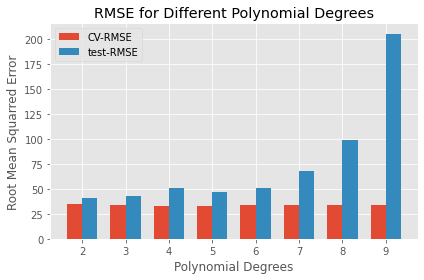

In [20]:
# Question B1: Plot mse vs polynomial degrees.
width = 0.35

labels = degree_nth_list
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, poly_avg_rmse_CV_list, width, label = 'CV-RMSE')
rects2 = ax.bar(x + width/2, poly_avg_rmse_test_list, width, label = 'test-RMSE')

ax.set_ylabel('Root Mean Squarred Error')
ax.set_xlabel('Polynomial Degrees')
ax.set_title('RMSE for Different Polynomial Degrees')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show();

### Question B1: Choose a polynomial degree.
Using 5-fold cross-validation, polynomial models of degrees 2 to 18 were trained. The root means the squared error (RMSE) was computed for the validation and test portion for every split. The lowest RMSE for the validation portion was obtained for the polynomial of degree 4, being 32.75, and the test portion, being 41.36,  was the polynomial of degree 2. However, the deviation in RMSE for the polynomial degrees of 2 to 7 for the validation portion is minimal while for the testing portion RMSE for degrees 2 and 3 are very close. Thus, the two best options are the polynomial of degrees 2 and 3. Thus, the optimal degree will be 2 as that would be computationally advantageous.


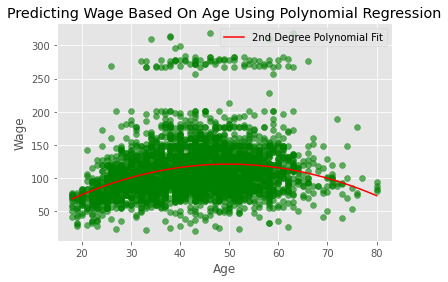

In [21]:
# Question B1: Make a plot of the resulting polynomial fit to the data.
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

X = np.array(X_train_B1).reshape(-1, 1)
y = np.array(y_train_B1)

polynomial_model = PolynomialFeatures(degree = 2)
X_poly = polynomial_model.fit_transform(X)
model_poly = sm.OLS(y, X_poly).fit()

x_val = np.linspace(X_test_B1.min(), X_test_B1.max(), 100)
x_val = np.array(x_val).reshape(-1,1) 
x_vals = polynomial_model.fit_transform(x_val)

y_pred = model_poly.predict(x_vals)
plt.plot(x_val, y_pred,  color = "red", label = "2nd Degree Polynomial Fit")


plt.scatter(data_x, data_y, color = "green", alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Predicting Wage Based On Age Using Polynomial Regression')

plt.legend()

plt.show();

In [22]:
# Question B2: Split the dataset into training (70%) and test sets (30%). 'B2' is for 'Question B2'. 
from sklearn.model_selection import train_test_split
X_train_B2, X_test_B2, y_train_B2, y_test_B2 = train_test_split(data_x, data_y, test_size = 0.3, random_state = 9)

In [23]:
X_train_B2.index

Int64Index([2459, 2110, 1572, 1934, 1428, 1968, 1980,  217, 1857, 1446,
            ...
            1558,  577, 1149,  918, 1787, 2104,  501, 2686,  348,  382],
           dtype='int64', length=2100)

In [24]:
# Question B2: Fit a step function to predict wage using age with cv to find the optimal number of cuts , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

k = 5
kf_5 = KFold(n_splits = k, random_state = 12, shuffle = True)
cut_list = np.arange(1,11)

X_B2 = X_train_B2
y_B2 = y_train_B2

step_avg_rmse_test_list = []

for cut_value in cut_list:
  
  step_rmse_test_list = []

  for train_index, test_index in kf_5.split(X_B2):
    X_train_B2_CV, X_test_B2_CV = X_B2.iloc[train_index], X_B2.iloc[test_index]
    y_train_B2_CV, y_test_B2_CV = y_B2.iloc[train_index], y_B2.iloc[test_index]

    df_cut, bins = pd.cut(X_train_B2_CV, cut_value, retbins = True, right = True)

    df_steps = pd.concat([X_train_B2_CV, df_cut, y_train_B2_CV], keys = ['age', 'age_cuts', 'wage'], axis = 1)
    df_steps_dummies = pd.get_dummies(df_cut)

    fit_step = sm.GLM(df_steps.wage, df_steps_dummies).fit()

    bin_mapping = np.digitize(X_test_B2, bins) 
    X_valid = pd.get_dummies(bin_mapping)
    X_valid = pd.get_dummies(bin_mapping).drop([cut_value], axis = 1)
    y_pred_B2 = fit_step.predict(X_valid)

    step_rmse_test = math.sqrt(mean_squared_error(y_test_B2, y_pred_B2))
    step_rmse_test_list.append(step_rmse_test)

  step_avg_rmse_test = sum(step_rmse_test_list)/len(step_rmse_test_list)
  step_avg_rmse_test_list.append(step_avg_rmse_test)

print(f"test-mse: {step_avg_rmse_test_list}")

test-mse: [116.63481651635031, 75.41212985164377, 48.51129828522204, 40.60580519838977, 39.35649454316739, 39.005626252534725, 38.24377981448132, 38.18582105531196, 38.17361029382138, 38.10774379350883]


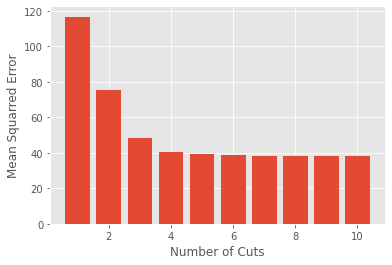

In [25]:
# Question B2: Plot mse vs number of cuts.
plt.bar(cut_list, step_avg_rmse_test_list)
plt.xlabel('Number of Cuts')
plt.ylabel('Mean Squarred Error')

plt.show();

### Question B1: Choose the number of cuts.
Using 5-fold cross-validation, step-function models of 1 to 10 cuts were trained. The root means squared error (RMSE) was computed for the test portion for every split. The lowest EMSE was obtained for a model with 10 cuts, being 38.10.  However, the deviation in EMSE for 7 to 10 cuts is minimal. Thus, it is possible to select a model with fewer cuts as that would be computationally advantageous. The optimal degree is 7.

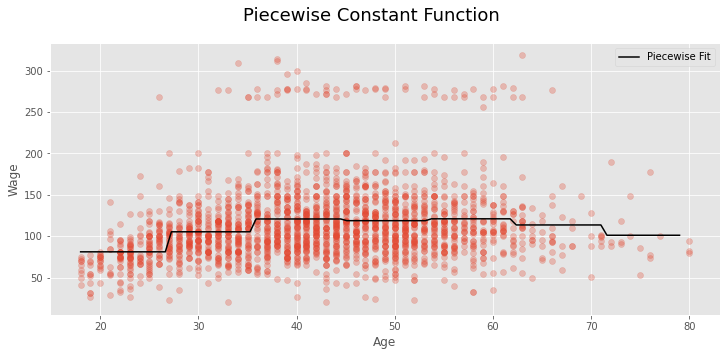

In [26]:
# Question B2: Plot the step function with 7 cuts.

df_cut, bins = pd.cut(X_train_B2_CV, 7, retbins = True, right = True)

df_steps = pd.concat([X_train_B2_CV, df_cut, y_train_B2_CV], keys = ['age', 'age_cuts', 'wage'], axis = 1)
df_steps_dummies = pd.get_dummies(df_cut)

fit_step = sm.GLM(df_steps.wage, df_steps_dummies).fit()

xp = np.linspace(X_test_B2.min(), X_test_B2.max() - 1, 100) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
pred2 = fit_step.predict(X_valid_2)

fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
_= fig.suptitle('Piecewise Constant Function ', fontsize=18)

_= ax1.scatter(X_train_B2, y_train_B2, alpha = 0.3)
_= ax1.plot(xp, pred2, color = 'black', label =  'Piecewise Fit')

_= ax1.set_xlabel('Age')
_= ax1.set_ylabel('Wage')

plt.legend()

plt.show();


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


## Part C

### Question C: The dataset selection
The dataset selected is from a Kaggle repository. The dataset contains data about MBA students from Jain University in Bangalore and was curated to investigate the frequency of MBA students getting work placements relative to various features. The dataset will be used to create a predictive model using random forest and support vector machines to predict whether a student will get a work placement or not. The features for the herein dataset are the following:    

*   Gender,
*   Secondary Education percentage - 10th Grade (%),
*   Board of Education - 10th Grade - Central/ Others,
*   Higher Secondary Education percentage- 12th Grade (%),
*   Board of Education - 12th Grade - Central/ Others,
*   Specialization in Higher Secondary Education,
*   Degree Percentage (%),
*   Under Graduation (Degree type) - Field of degree education,
*   Work Experience - Yes/No,
*   Entrance Test Percentage (%),
*   MBA Specialization,
*   Work Placement - Placed/Not Placed,
*   Salary.

For more information on the sources or details of the dataset, please visit the following link: https://www.kaggle.com/benroshan/factors-affecting-campus-placement?select=Placement_Data_Full_Class.csv.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns; sns.set_theme()

In [28]:
# Question C: Dowload Dataset.
from google.colab import files
uploaded = files.upload()
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class (2).csv


In [29]:
# Question C: Conduct some data exploration on dataset.
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [30]:
placement_data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [31]:
placement_data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [32]:
placement_data.shape

(215, 15)

In [33]:
placement_data.describe(include = 'all')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


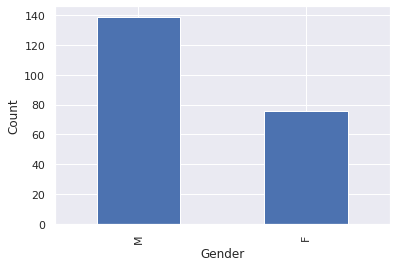

In [34]:
placement_data['gender'].value_counts().plot(kind = 'bar', xlabel = 'Gender', ylabel = 'Count');

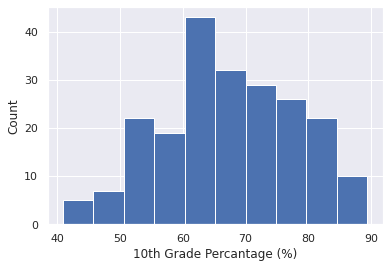

In [35]:
plt.hist(placement_data['ssc_p'])
plt.xlabel('10th Grade Percantage (%)')
plt.ylabel('Count')
plt.show();

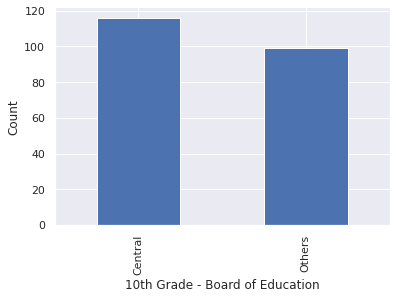

In [36]:
placement_data['ssc_b'].value_counts().plot(kind = 'bar', xlabel = '10th Grade - Board of Education', ylabel = 'Count');

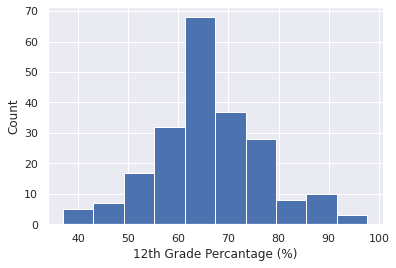

In [37]:
plt.hist(placement_data['hsc_p'])
plt.xlabel('12th Grade Percantage (%)')
plt.ylabel('Count')
plt.show();

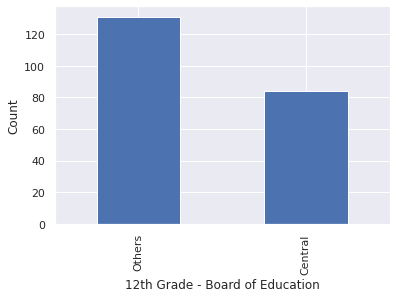

In [38]:
placement_data['hsc_b'].value_counts().plot(kind = 'bar', xlabel = '12th Grade - Board of Education', ylabel = 'Count');

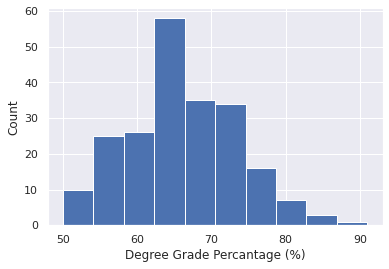

In [39]:
plt.hist(placement_data['degree_p'])
plt.xlabel('Degree Grade Percantage (%)')
plt.ylabel('Count')
plt.show();

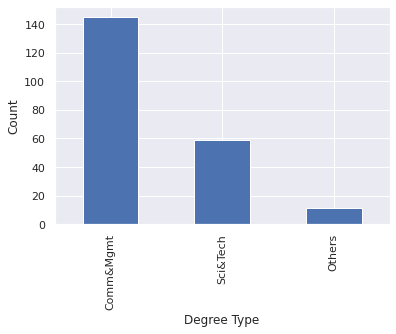

In [40]:
placement_data['degree_t'].value_counts().plot(kind = 'bar', xlabel = 'Degree Type', ylabel = 'Count');

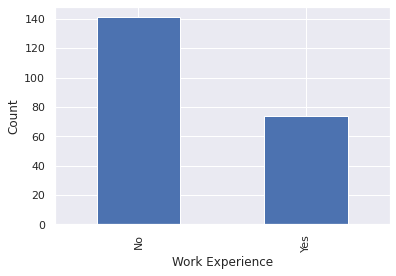

In [41]:
placement_data['workex'].value_counts().plot(kind = 'bar', xlabel = 'Work Experience', ylabel = 'Count');

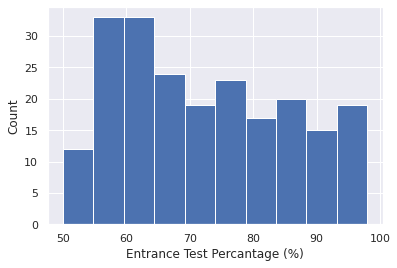

In [42]:
plt.hist(placement_data['etest_p'])
plt.xlabel('Entrance Test Percantage (%)')
plt.ylabel('Count')
plt.show();

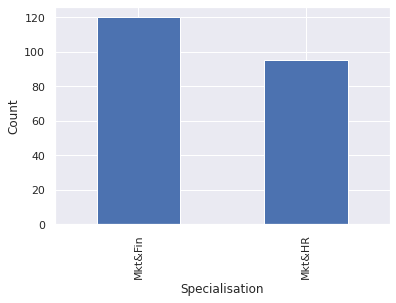

In [43]:
placement_data['specialisation'].value_counts().plot(kind = 'bar', xlabel = 'Specialisation', ylabel = 'Count');

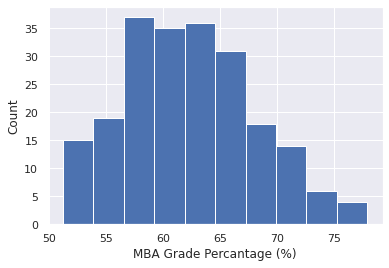

In [44]:
plt.hist(placement_data['mba_p'])
plt.xlabel('MBA Grade Percantage (%)')
plt.ylabel('Count')
plt.show();

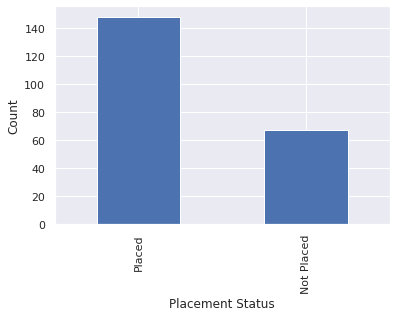

In [45]:
placement_data['status'].value_counts().plot(kind = 'bar', xlabel = 'Placement Status', ylabel = 'Count');

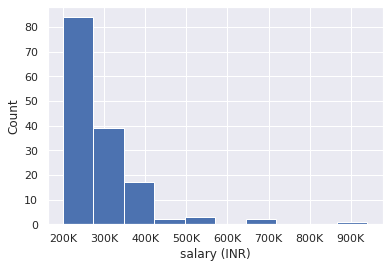

In [46]:
plt.hist(placement_data['salary'])
plt.xlabel('salary (INR)')
plt.ylabel('Count')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:1.0f}K'.format(x) for x in current_values * 0.001])
plt.show();

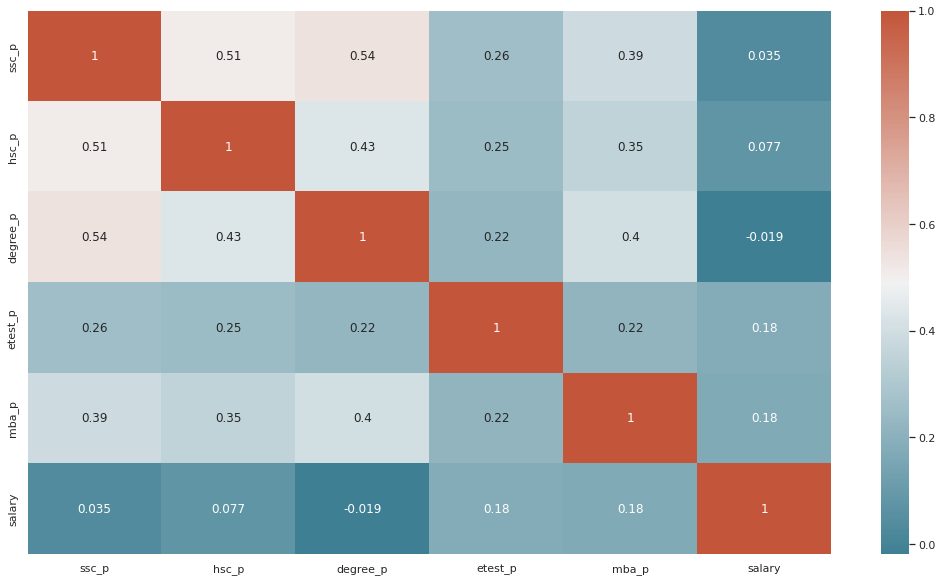

In [47]:
placement_data_corr = placement_data.drop(['sl_no'], axis = 1)
pd_corr = placement_data_corr.corr()
sns.set(rc = {'figure.figsize':(18,10)})
sns.heatmap(pd_corr, 
            xticklabels = pd_corr.columns, 
            yticklabels = pd_corr.columns, 
            annot = True, 
            cmap = sns.diverging_palette(220, 20, as_cmap = True))

In [48]:
placement_data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [49]:
duplicateRowsDF = placement_data[placement_data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :", duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are : Empty DataFrame
Columns: [sl_no, gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, status, salary]
Index: []


### Question C: Obsrvations based on data exploration.
*   The dataset has 15 features, whom 1 is a serial integer, 6 are numerical features and 8 are categorical features. 
*   The dataset contains 215 observations.
*   All columns have the same number of values except the 'salary' column. Only 148 observations have a value for the 'salary' column and the rest don't as they didn't get a placement.
*   The observations consist of 139 males and 76 females.
*   The mean of the 10th grade, 12th grade, and degree percentage scores hover around 66 %.
*   The student placement salaries are mostly between 200K to 400K INR.
*   There are only null values in the 'salary' column.
*   There no duplicate observations. 

### Question C: Features to be used
For the sake of this study, the serial integer, the categorical features and the salary of students will be omitted. The target variable will be the 'Work Placement' categorical features and the remaining features will be predictors.

In [50]:
# Question C: Segregate the predictors and target variable.
X_C = placement_data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
y_C = placement_data['status']

In [51]:
X_C.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50


In [52]:
y_C.head()

0        Placed
1        Placed
2        Placed
3    Not Placed
4        Placed
Name: status, dtype: object

In [53]:
# Question C: Split the dataset into training (70%) and test sets (30%). 'C' is for 'Question C'.
from sklearn.model_selection import train_test_split
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y_C, test_size = 0.3, random_state = 10)

In [54]:
# Question C: Scale data for testing and training.
from sklearn.preprocessing import StandardScaler, scale
scaler = StandardScaler().fit(X_train_C)
X_train_scaled = scaler.transform(X_train_C)
X_test_scaled = scaler.transform(X_test_C)

In [55]:
# Question C: Build random forest classifier.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
kf_5 = KFold(n_splits = 5)
rfc_ = RandomForestClassifier()
dict_para = {'n_estimators': [20, 40, 80, 100], 'min_samples_split': [4, 8, 12], 'criterion': ('gini', 'entropy'), 'max_leaf_nodes': [4, 8, 12]}
gscv_rfc_ = GridSearchCV(rfc_ ,dict_para, cv = kf_5)
gscv_rfc_.fit(X_train_scaled, y_train_C)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_leaf_nodes': [4, 8, 12],
                         'min_samples_split': [4, 8, 12],
                         'n_estimators': [20, 40, 80, 100]})

In [56]:
gscv_rfc_.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 4,
 'min_samples_split': 4,
 'n_estimators': 40}

In [57]:
results_rfc_ = pd.DataFrame(gscv_rfc_.cv_results_)
results_rfc_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038413,0.011262,0.003216,0.000508,gini,4,4,20,"{'criterion': 'gini', 'max_leaf_nodes': 4, 'mi...",0.866667,0.700000,0.866667,0.833333,0.9,0.833333,0.069921,7
1,0.066997,0.006648,0.005875,0.000886,gini,4,4,40,"{'criterion': 'gini', 'max_leaf_nodes': 4, 'mi...",0.900000,0.766667,0.900000,0.800000,0.9,0.853333,0.058119,1
2,0.114395,0.010883,0.008628,0.000311,gini,4,4,80,"{'criterion': 'gini', 'max_leaf_nodes': 4, 'mi...",0.833333,0.766667,0.866667,0.766667,0.9,0.826667,0.053333,22
3,0.145885,0.007534,0.011352,0.001310,gini,4,4,100,"{'criterion': 'gini', 'max_leaf_nodes': 4, 'mi...",0.800000,0.766667,0.866667,0.766667,0.9,0.820000,0.054160,43
4,0.031203,0.004456,0.003242,0.000467,gini,4,8,20,"{'criterion': 'gini', 'max_leaf_nodes': 4, 'mi...",0.833333,0.733333,0.866667,0.766667,0.9,0.820000,0.061824,43


In [58]:
best_gs_est_rfc_ = gscv_rfc_.best_estimator_
best_gs_est_rfc_

RandomForestClassifier(max_leaf_nodes=4, min_samples_split=4, n_estimators=40)

In [59]:
y_pred_rfc_ = best_gs_est_rfc_.predict(X_test_scaled)

In [60]:
from sklearn.metrics import confusion_matrix
confusing_matric_rfc_ = confusion_matrix(y_test_C, y_pred_rfc_)
print(confusing_matric_rfc_)

[[14  9]
 [ 2 40]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test_C, y_pred_rfc_))

              precision    recall  f1-score   support

  Not Placed       0.88      0.61      0.72        23
      Placed       0.82      0.95      0.88        42

    accuracy                           0.83        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.84      0.83      0.82        65



In [62]:
# Question C: Build support vector classifier.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
kf_5 = KFold(n_splits = 5)
svc_ = SVC()
dict_para = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]}
gscv_svc_ = GridSearchCV(svc_ , dict_para, cv = kf_5)
gscv_svc_.fit(X_train_scaled, y_train_C)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [63]:
gscv_svc_.best_params_

{'C': 36, 'kernel': 'poly'}

In [64]:
results_svc_ = pd.DataFrame(gscv_svc_.cv_results_)
results_svc_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003491,0.000747,0.001146,0.000108,4,linear,"{'C': 4, 'kernel': 'linear'}",0.833333,0.8,0.900000,0.800000,0.900000,0.846667,0.045216,9
1,0.002495,0.000246,0.001112,0.000212,4,poly,"{'C': 4, 'kernel': 'poly'}",0.833333,0.7,0.866667,0.800000,0.900000,0.820000,0.068638,26
2,0.001450,0.000053,0.000640,0.000037,4,rbf,"{'C': 4, 'kernel': 'rbf'}",0.833333,0.8,0.933333,0.800000,0.933333,0.860000,0.061101,5
3,0.001297,0.000092,0.000575,0.000020,4,sigmoid,"{'C': 4, 'kernel': 'sigmoid'}",0.833333,0.7,0.833333,0.866667,0.833333,0.813333,0.058119,29
4,0.004185,0.001365,0.000947,0.000115,8,linear,"{'C': 8, 'kernel': 'linear'}",0.800000,0.8,0.900000,0.800000,0.900000,0.840000,0.048990,13


In [65]:
best_gs_est_svc_ = gscv_svc_.best_estimator_
best_gs_est_svc_

SVC(C=36, kernel='poly')

In [66]:
y_pred_svc_ = best_gs_est_svc_.predict(X_test_scaled)

In [67]:
from sklearn.metrics import confusion_matrix
confusing_matric_svc_ = confusion_matrix(y_test_C, y_pred_svc_)
print(confusing_matric_svc_)

[[16  7]
 [ 5 37]]


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test_C, y_pred_svc_))

              precision    recall  f1-score   support

  Not Placed       0.76      0.70      0.73        23
      Placed       0.84      0.88      0.86        42

    accuracy                           0.82        65
   macro avg       0.80      0.79      0.79        65
weighted avg       0.81      0.82      0.81        65



### Question C: Evaluate Performance and choose the best model.
Both models used a training and test split of respectfully 70 % and 30 %. Only the numerical features based on the 'salary' column were used as predictors to train the random forest (RFC) and support vector classifiers (SVC). The 'GridSearchCV' function was used to search for an optimal combination of parameters for each model type. The best parameters among the respective batches were used to generate a confusion matrix and classification report for both. When comparing their confusing matrices, the SVC had a higher number of true positives (16) in comparison to the RFC's number of true positives (14). On the other hand, the RFC had a higher number of true negatives (40) versus the SVC's with 37 true negatives. Thus, the SVC is slightly better at detecting the placed students while the RFC is slightly better for the non-placed students. When looking at the classification reports for each model, specifically the weighted averages. The RFC had slightly higher precision, recall, and f1 scores in comparison as well as a higher accuracy of 83 % vs the 82 % accuracy of the SVC model. Thus, RFC is the more performing model based on the features selected and model parameters tested.


## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


## Part D

In [69]:
# Question D1: Generate 2D data with 500 observations with 3 Gaussian clusters.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import math
import pandas as pd

mean_d1 = [1, 2]
mean_d2 = [3, 5]
mean_d3 = [4, 0]
cov = [[2, 1], [1, 2]] 
x1, y1 = np.random.multivariate_normal(mean_d1, cov, 167).T
x2, y2 = np.random.multivariate_normal(mean_d2, cov, 167).T
x3, y3 = np.random.multivariate_normal(mean_d3, cov, 166).T
x = np.concatenate((x1, x2, x3), axis = 0)
y = np.concatenate((y1, y2, y3), axis = 0)
data = pd.DataFrame(data = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1))),columns = ['x', 'y'])
data.describe(include = 'all')

,x,y
count,500.000000,500.000000
mean,2.659087,2.358163
std,1.908286,2.499178
min,-3.509099,-3.106122
25%,1.309840,0.443720
50%,2.791014,2.200424
75%,4.100108,4.495615
max,7.921330,8.485507


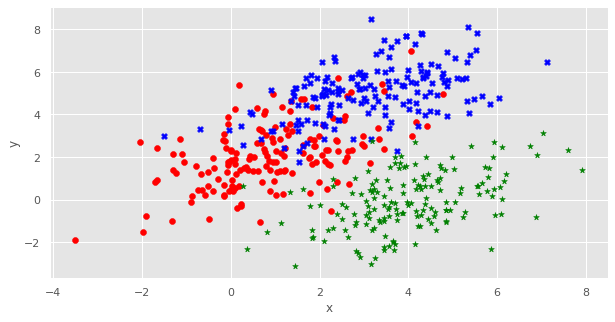

In [70]:
# Question D2: Plot scatter plot with clusters.
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
plt.scatter(x1, y1, color = 'red', marker = 'o')
plt.scatter(x2, y2, color = 'blue', marker = 'X')
plt.scatter(x3, y3, color = 'green', marker = '*')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

In [71]:
# Question D3: Shuffle the data and cluster data with different K-means.
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
data_s = shuffle(data)
centroids_list = []
labels_list = []
for clusters in range(2,5):
  kmeans = KMeans(n_clusters = clusters)
  kmeans = kmeans.fit(data_s)
  labels = kmeans.predict(data_s)
  centroids = kmeans.cluster_centers_
  centroids_list.append(centroids)
  labels_list.append(labels)

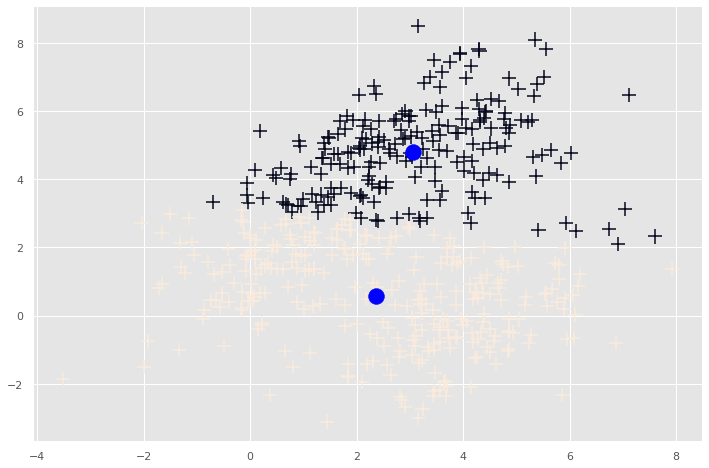

In [72]:
# Plot scatter plot for K = 2
centroids = centroids_list[0]
figsize = plt.figure(figsize = (12,8))
plt.scatter(data_s['x'], data_s['y'], c = labels_list[0], s = 200, marker = "+") 
plt.scatter(centroids[:,0], centroids[:,1], c = 'blue', s = 1000, marker = ".")
plt.show();

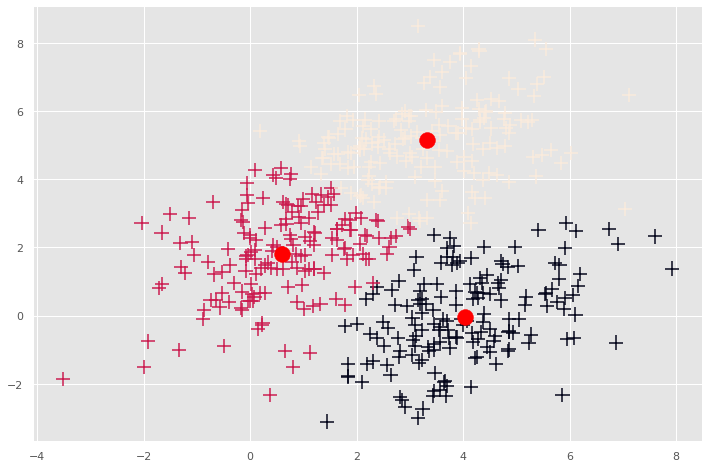

In [73]:
# Plot scatter plot for K = 3
centroids = centroids_list[1]
figsize = plt.figure(figsize = (12,8))
plt.scatter(data_s['x'], data_s['y'], c = labels_list[1], s = 200, marker = "+") 
plt.scatter(centroids[:,0], centroids[:,1], c = 'red', s = 1000, marker = ".")
plt.show();

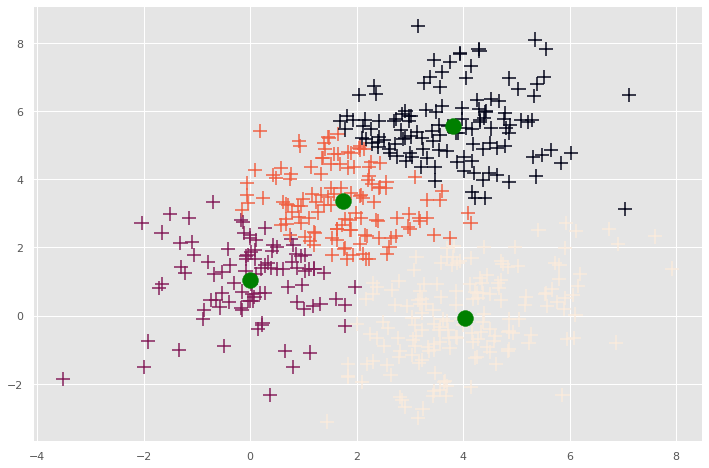

In [74]:
# Plot scatter plot for K = 4
centroids = centroids_list[2]
figsize = plt.figure(figsize = (12,8))
plt.scatter(data_s['x'], data_s['y'], c = labels_list[2], s = 200, marker = "+") 
plt.scatter(centroids[:,0], centroids[:,1], c = 'green', s = 1000, marker = ".")
plt.show();